Ej1

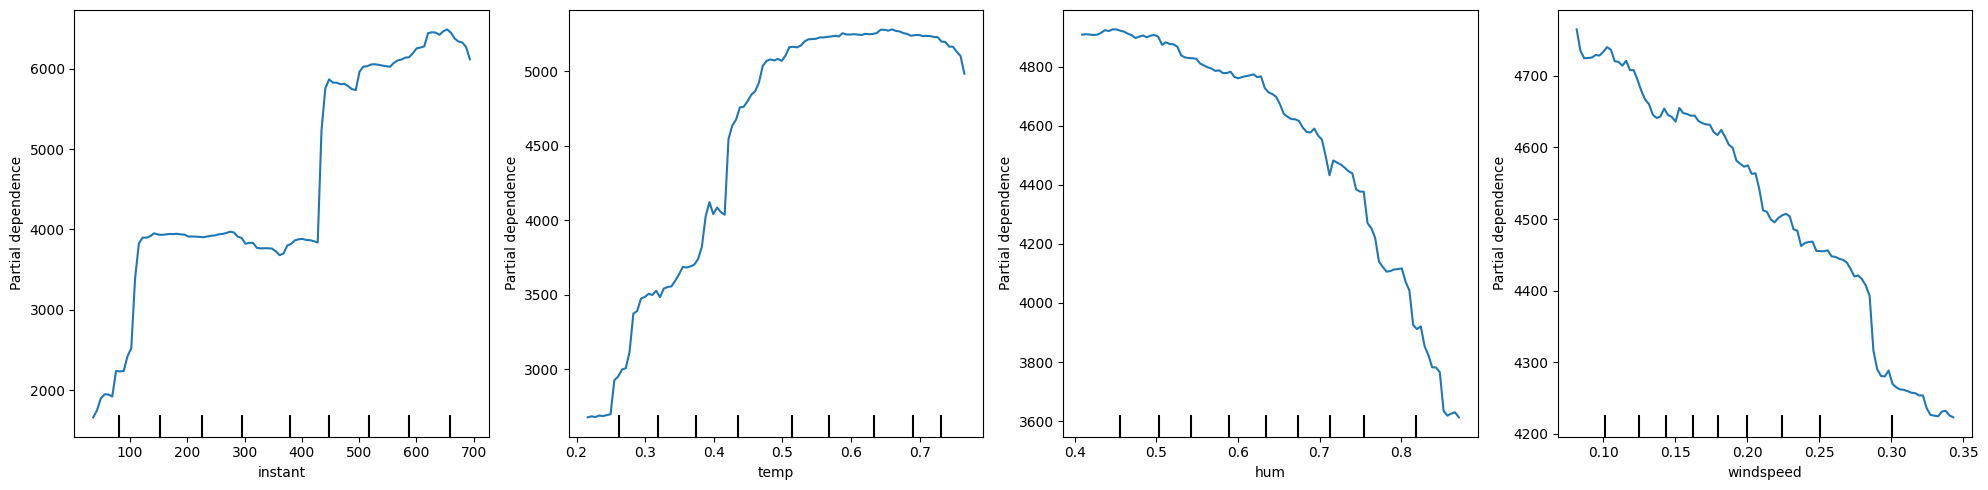

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Cargar datos
df = pd.read_csv("day.csv")

features = ['instant', 'temp', 'hum', 'windspeed']
target = 'cnt'

X = df[features]
y = df[target]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



# Calcular el valor máximo de predicción para fijar el eje Y
y_pred_max = model.predict(X_train).max()

# PDPs con ajuste dinámico del eje Y
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, feature in enumerate(['instant', 'temp', 'hum', 'windspeed']):
    PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=[feature],
        ax=axs[i],
        kind="average"
    )
    axs[i].set_ylim(0, y_pred_max)
    axs[i].set_ylabel("Predicted number of bike rentals")

plt.tight_layout()
plt.show()



